In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(7008, 4672, 3)


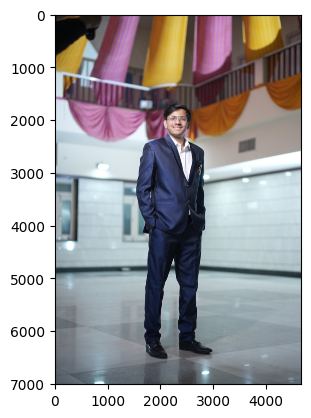

In [23]:
im=cv2.imread('ab.JPG')# read an image in BGR Format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image=im
print(im.shape)
plt.imshow(im)

In [10]:
# flatten each channel of the image in linear array 
all_pixels=im.reshape((7008*4672, 3))
print(all_pixels.shape)

# one linear array for each color, (red , green , and blue channel)

(32741376, 3)


In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [13]:
centers=km.cluster_centers_
centers=np.array(centers, dtype='uint8')
print(centers)

[[198 213 219]
 [103  83  79]
 [158 153 153]
 [ 34  33  44]]


# Plot all colors 

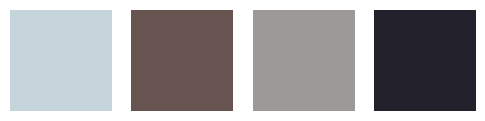

In [15]:
plt.figure(0,figsize=(6,2))
i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    # Color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

# Segmenting Our Original Image

In [16]:
new_img=np.zeros((7008*4672, 3), dtype='uint8')
print(new_img.shape)

(32741376, 3)


In [17]:
colors

[array([198, 213, 219], dtype=uint8),
 array([103,  83,  79], dtype=uint8),
 array([158, 153, 153], dtype=uint8),
 array([34, 33, 44], dtype=uint8)]

In [18]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1])

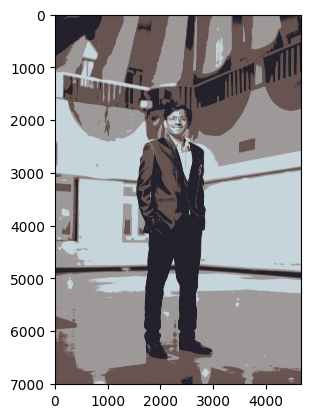

In [19]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
# print(original_image)

new_img=new_img.reshape((original_image))
# print(new_img.shape)
plt.imshow(new_img)
plt.show()

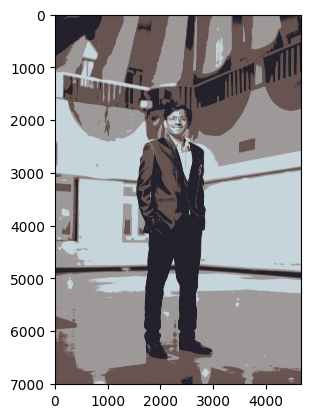

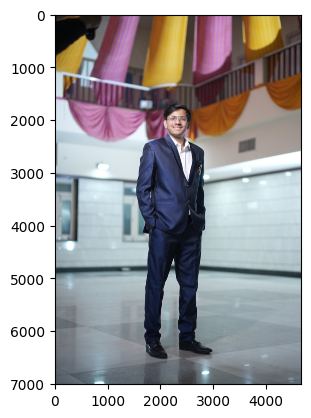

In [27]:
#compare the image after dominating get extracted from image
plt.imshow(new_img)
plt.show()
plt.imshow(original_image)